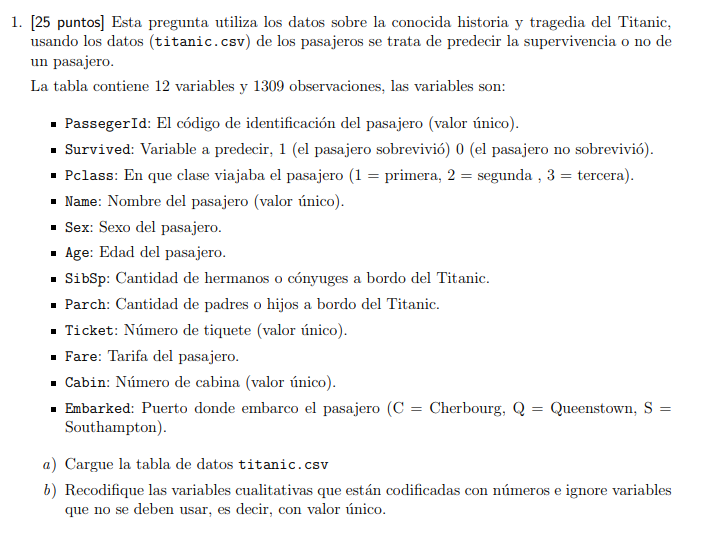

## Ejercicio 1.a

In [1]:
import os
import pandas as pd
import numpy as np

os.chdir("/Users/Andrey/Desktop/Data-Science-Course/V Lecture")

pd.set_option('display.max_rows', 1000)

datos = pd.read_csv('Titanic.csv',delimiter=',',decimal=".",index_col=0)
print(datos)

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   
11                  1       3   
12                  1       1   
13                  0       3   
14                  0       3   
15                  0       3   
16                  1       2   
17                  0       3   
18                  1       2   
19                  0       3   
20                  1       3   
21                  0       2   
22                  1       2   
23                  1       3   
24                  1       1   
25                  0       3   
26                  1       3   
27                  0       3   
28                  0       1   
29        

## Ejercicio 1.b

In [2]:
def recodificar(col, nuevo_codigo):
  col_cod = pd.Series(col, copy=True)
  for llave, valor in nuevo_codigo.items():
    col_cod.replace(llave, valor, inplace=True)
  return col_cod

datos["Survived"] = recodificar(datos["Survived"], {0:'No',1:'Yes'})
datos["Pclass"] = recodificar(datos["Pclass"], {1:'First',2:'Second',3:'Third'})
datos["Embarked"] = recodificar(datos["Embarked"], {'C':'Cherbourg', 'Q':'Queenstown','S':'Southampton'})

print(datos.head())

print("******************************\n")

print(datos['Survived'].value_counts())

print("******************************\n")

print(datos['Pclass'].value_counts())

print("******************************\n")

print(datos['Embarked'].value_counts())

            Survived Pclass  \
PassengerId                   
1                 No  Third   
2                Yes  First   
3                Yes  Third   
4                Yes  First   
5                 No  Third   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin     Embarked  
PassengerId                                                              
1                1      0         A/5 21171   7.2500   NaN  Southampton  

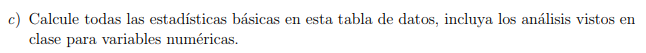

In [3]:
print("******************************\n")

print("Describe")

print(datos.dropna().describe())

print("******************************\n")

print("Means")

print(datos.mean(numeric_only=True))

print("******************************\n")

print("STDs")

print(datos.median(numeric_only=True))

print("******************************\n")

print("Maximo")

print(datos.max(numeric_only=True))

print("******************************\n")

print("Percentiles")

print(datos.quantile(np.array([0,.25,.50,.75,1])))

print("******************************\n")

print("Datos en variables categóricas\n")

print("Sobrevivientes:")

print(datos['Survived'].value_counts())

print("******************************\n")

print("Clase:")

print(datos['Pclass'].value_counts())

print("******************************\n")

print("Puerto en el que embarcó:")

print(datos['Embarked'].value_counts())

print("******************************\n")

print("TABLA CRUZADA - Supervivencia por clase:")

survived_pclass = pd.crosstab(index=datos["Survived"], columns=datos["Pclass"])
print(survived_pclass)

print("******************************\n")

print("TABLA CRUZADA - Supervivencia por puerto de embarco:")

survived_pclass = pd.crosstab(index=datos["Survived"], columns=datos["Embarked"])
print(survived_pclass)

print("TABLA CRUZADA - Supervivencia por genero:")

survived_pclass = pd.crosstab(index=datos["Survived"], columns=datos["Sex"])
print(survived_pclass)

******************************

Describe
              Age       SibSp       Parch        Fare
count  270.000000  270.000000  270.000000  270.000000
mean    36.825630    0.507407    0.477778   84.942193
std     15.569971    0.643773    0.788784   80.698651
min      0.920000    0.000000    0.000000    0.000000
25%     25.000000    0.000000    0.000000   30.000000
50%     36.000000    0.000000    0.000000   60.587500
75%     48.000000    1.000000    1.000000  103.193750
max     80.000000    3.000000    4.000000  512.329200
******************************

Means
Age      29.842596
SibSp     0.499617
Parch     0.385616
Fare     33.223956
dtype: float64
******************************

STDs
Age      28.0000
SibSp     0.0000
Parch     0.0000
Fare     14.4542
dtype: float64
******************************

Maximo
Age       80.0000
SibSp      8.0000
Parch      9.0000
Fare     512.3292
dtype: float64
******************************

Percentiles
        Age  SibSp  Parch      Fare
0.00   0.17    0.0

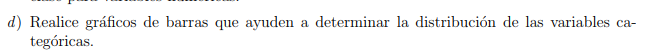

In [4]:
import matplotlib.pyplot as plt

print("SURVIVED")

survived = pd.crosstab(index=datos["Survived"], columns="count") 

alto = [survived['count'][0], survived['count'][1]]
barras = ('NO', 'YES')
y_pos = np.arange(len(barras))
plt.bar(y_pos, alto, color=['red','blue'])
plt.xticks(y_pos, barras)

SURVIVED


([<matplotlib.axis.XTick at 0x1c993e03908>,
 <a list of 2 Text xticklabel objects>)

******************************

CLASS


([<matplotlib.axis.XTick at 0x1c993fd8320>,
 <a list of 3 Text xticklabel objects>)

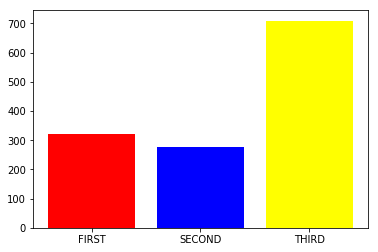

In [5]:
print("******************************\n")

print("CLASS")

pclass = pd.crosstab(index=datos["Pclass"], columns="count") 

alto = [pclass['count'][0], pclass['count'][1], pclass['count'][2]]
barras = ('FIRST', 'SECOND', 'THIRD')
y_pos = np.arange(len(barras))
plt.bar(y_pos, alto, color=['red','blue', 'yellow'])
plt.xticks(y_pos, barras)

##

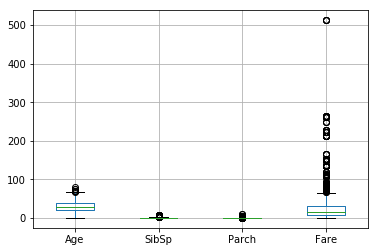

In [6]:
datos.head()
boxplots = datos.boxplot(return_type='axes')

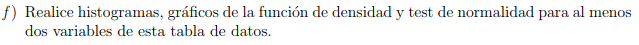

Graficos funcion de densidad para hermanos o conyugues


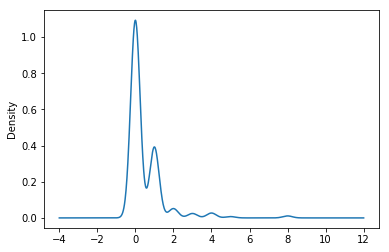

In [7]:
print("Graficos funcion de densidad para hermanos o conyugues")

densidad = datos["SibSp"].plot(kind='density')

Graficos funcion de densidad para hijos o padres


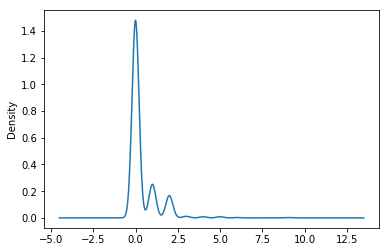

In [8]:
print("Graficos funcion de densidad para hijos o padres")

densidad = datos["Parch"].plot(kind='density')

Graficos funcion de densidad para edades


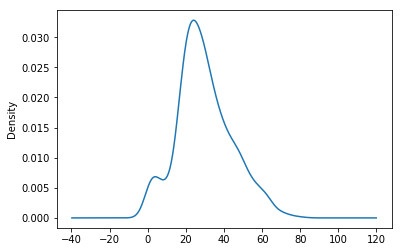

In [9]:
print("Graficos funcion de densidad para edades")

densidad = datos["Age"].plot(kind='density')

Histogramas para hermanos o conyugues


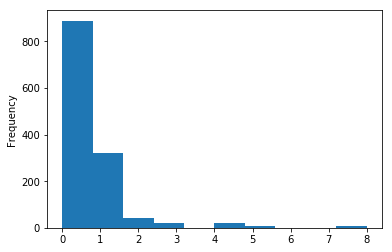

In [10]:
print("Histogramas para hermanos o conyugues")

densidad = datos["SibSp"].plot(kind='hist')

Histogramas para hijos o padres


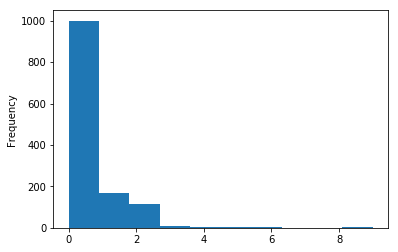

In [11]:
print("Histogramas para hijos o padres")

densidad = datos["Parch"].plot(kind='hist')

Histogramas para edades


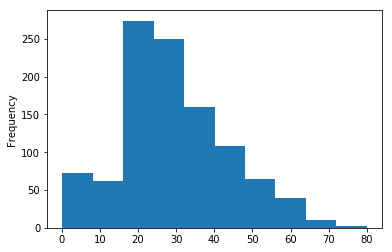

In [12]:
print("Histogramas para edades")

densidad = datos["Age"].plot(kind='hist')

In [13]:
import scipy.stats

"""
Para pruebas de normalidad siempre se plantean así las hipótesis.

Hipótesis:

H0: La muestra proviene de una distribución normal.

H1: La muestra no proviene de una distribución normal.

Nivel de Significancia: El nivel de significancia que se trabajará es de 0.05. Alpha=0.05

Criterio de Decisión

Si P < Alpha Se rechaza H0

Si p >= Alpha No se rechaza H0, es decir, los datos SÍ siguen la normal
"""

shapiro_resultados = scipy.stats.shapiro(datos.iloc[:,6:7])
print(shapiro_resultados)

p_value = shapiro_resultados[1]
print(p_value)

alpha = 0.05
if p_value > alpha:
    print('Sí sigue la curva Normal (No se rechaza H0)')
else:
    print('No sigue la curva Normal (Se rechaza H0)')

(0.49837225675582886, 0.0)
0.0
No sigue la curva Normal (Se rechaza H0)


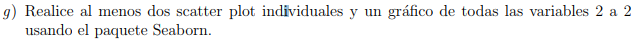

C:\Users\Andrey\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Andrey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Andrey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Andrey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer

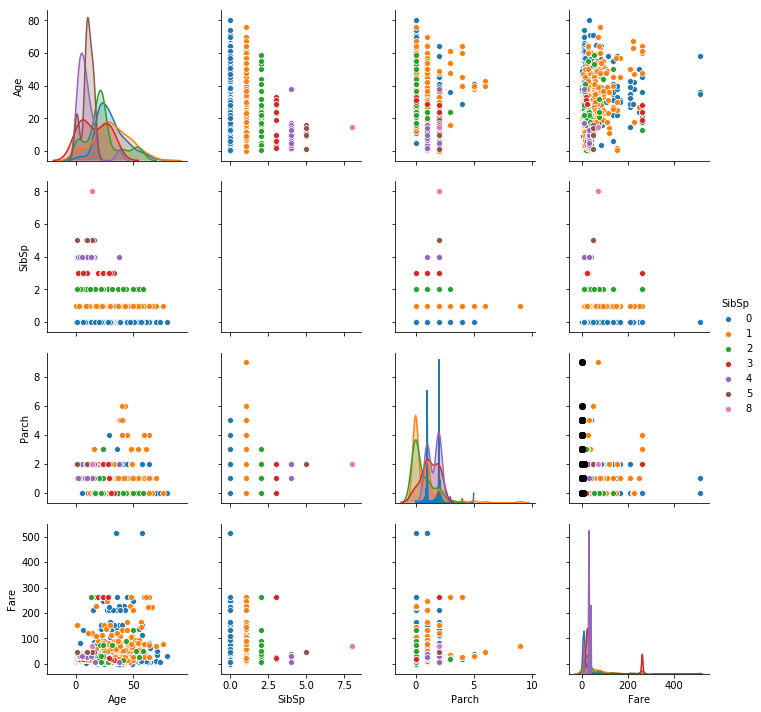

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(datos, hue='SibSp', size=2.5)

x = datos.iloc[:]["SibSp"]
y = datos.iloc[:]["Parch"]
plt.plot(x, y, 'o', color='black')

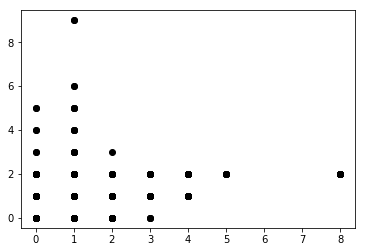

In [15]:
x = datos.iloc[:]["SibSp"]
y = datos.iloc[:]["Parch"]
plt.plot(x, y, 'o', color='black')

Matriz de correlaciones 

            Age     SibSp     Parch      Fare
Age    1.000000 -0.242910 -0.149992  0.177206
SibSp -0.242910  1.000000  0.373383  0.161030
Parch -0.149992  0.373383  1.000000  0.222327
Fare   0.177206  0.161030  0.222327  1.000000


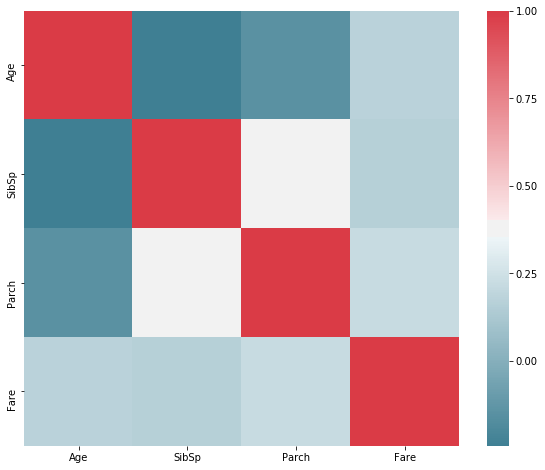

In [16]:
corr = datos.corr()
print("Matriz de correlaciones \n")
print(corr)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

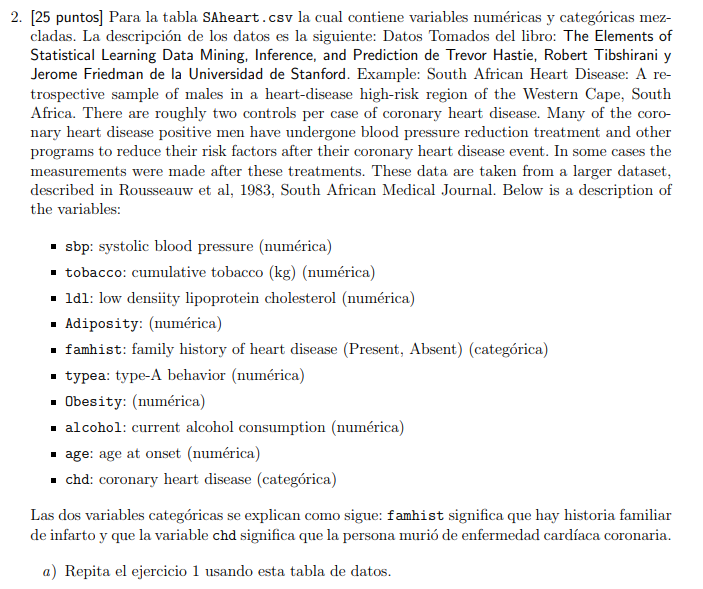

## 2.a - Cargue los datos

In [17]:
import os
import pandas as pd
import numpy as np

os.chdir("/Users/Andrey/Desktop/Data-Science-Course/V Lecture")

pd.set_option('display.max_rows', 1000)

datos = pd.read_csv('SAheart.csv',delimiter=';',decimal=".",index_col=0)
print(datos)

     tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age chd
sbp                                                                      
160    12.00   5.73      23.11  Present     49    25.30    97.20   52  Si
144     0.01   4.41      28.61   Absent     55    28.87     2.06   63  Si
118     0.08   3.48      32.28  Present     52    29.14     3.81   46  No
170     7.50   6.41      38.03  Present     51    31.99    24.26   58  Si
134    13.60   3.50      27.78  Present     60    25.99    57.34   49  Si
132     6.20   6.47      36.21  Present     62    30.77    14.14   45  No
142     4.05   3.38      16.20   Absent     59    20.81     2.62   38  No
114     4.08   4.59      14.60  Present     62    23.11     6.72   58  Si
114     0.00   3.83      19.40  Present     49    24.86     2.49   29  No
132     0.00   5.80      30.96  Present     69    30.11     0.00   53  Si
206     6.00   2.95      32.27   Absent     72    26.81    56.06   60  Si
134    14.10   4.44      22.39  Presen

## 2.b - Recodifique las variables cualitativas que están codificadas con números e ignore variables que no se deben usar, es decir, con valor único.

### Este paso no es necesario para este data set

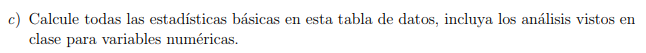

In [18]:
print("******************************\n")

print("Describe")

print(datos.dropna().describe())

print("******************************\n")

print("Means")

print(datos.mean(numeric_only=True))

print("******************************\n")

print("STDs")

print(datos.median(numeric_only=True))

print("******************************\n")

print("Maximo")

print(datos.max(numeric_only=True))

print("******************************\n")

print("Percentiles")

print(datos.quantile(np.array([0,.25,.50,.75,1])))

print("******************************\n")

print("Datos en variables categóricas\n")

print("Historial Familiar:")

print(datos['famhist'].value_counts())

print("******************************\n")

print("Coronary Heart Disease:")

print(datos['chd'].value_counts())

print("******************************\n")

print("TABLA CRUZADA - Historial familiar por Coronary Heart Disease:")

famhist_chd = pd.crosstab(index=datos["famhist"], columns=datos["chd"])
print(famhist_chd)

******************************

Describe
          tobacco         ldl   adiposity       typea     obesity     alcohol  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean     3.635649    4.740325   25.406732   53.103896   26.044113   17.044394   
std      4.593024    2.070909    7.780699    9.817534    4.213680   24.481059   
min      0.000000    0.980000    6.740000   13.000000   14.700000    0.000000   
25%      0.052500    3.282500   19.775000   47.000000   22.985000    0.510000   
50%      2.000000    4.340000   26.115000   53.000000   25.805000    7.510000   
75%      5.500000    5.790000   31.227500   60.000000   28.497500   23.892500   
max     31.200000   15.330000   42.490000   78.000000   46.580000  147.190000   

              age  
count  462.000000  
mean    42.816017  
std     14.608956  
min     15.000000  
25%     31.000000  
50%     45.000000  
75%     55.000000  
max     64.000000  
******************************

Means
tobacco    

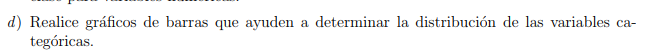

Family History


([<matplotlib.axis.XTick at 0x1c996737668>,
 <a list of 2 Text xticklabel objects>)

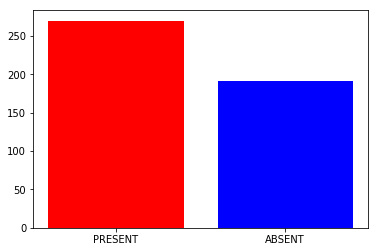

In [19]:
import matplotlib.pyplot as plt

print("Family History")

famhist = pd.crosstab(index=datos["famhist"], columns="count") 

alto = [famhist['count'][0], famhist['count'][1]]
barras = ('PRESENT', 'ABSENT')
y_pos = np.arange(len(barras))
plt.bar(y_pos, alto, color=['red','blue'])
plt.xticks(y_pos, barras)

******************************

Coronary Heart Disease


([<matplotlib.axis.XTick at 0x1c99389cf60>,
 <a list of 2 Text xticklabel objects>)

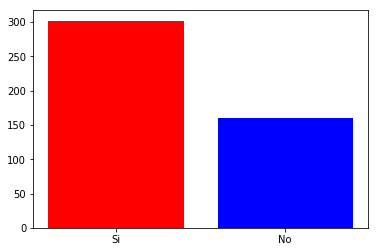

In [20]:
print("******************************\n")

print("Coronary Heart Disease")

chd = pd.crosstab(index=datos["chd"], columns="count") 

alto = [chd['count'][0], chd['count'][1]]
barras = ('Si', 'No')
y_pos = np.arange(len(barras))
plt.bar(y_pos, alto, color=['red','blue', 'yellow'])
plt.xticks(y_pos, barras)

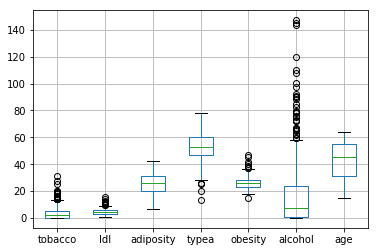

In [21]:
datos.head()
boxplots = datos.boxplot(return_type='axes')

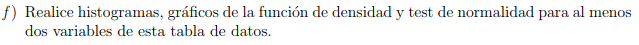

Graficos funcion de densidad para tobacco


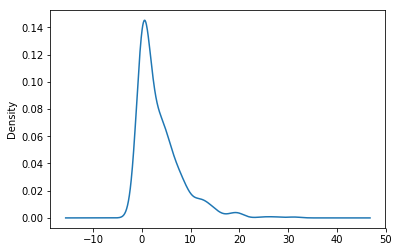

In [22]:
print("Graficos funcion de densidad para tobacco")

densidad = datos["tobacco"].plot(kind='density')

Graficos funcion de densidad para low densiity lipoprotein 


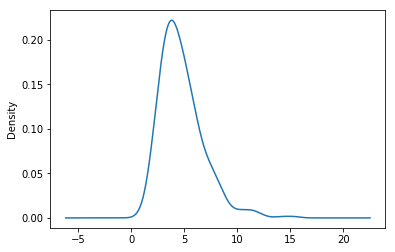

In [23]:
print("Graficos funcion de densidad para low densiity lipoprotein ")

densidad = datos["ldl"].plot(kind='density')

Graficos funcion de densidad para adiposity


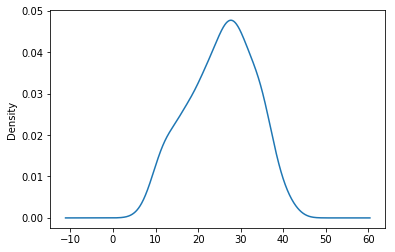

In [24]:
print("Graficos funcion de densidad para adiposity")

densidad = datos["adiposity"].plot(kind='density')

Graficos funcion de densidad para type A


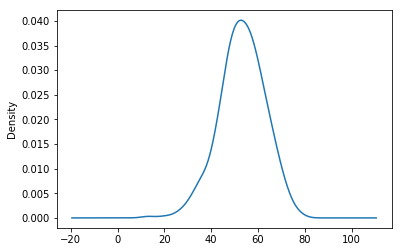

In [25]:
print("Graficos funcion de densidad para type A")

densidad = datos["typea"].plot(kind='density')

Graficos funcion de densidad para obesidad


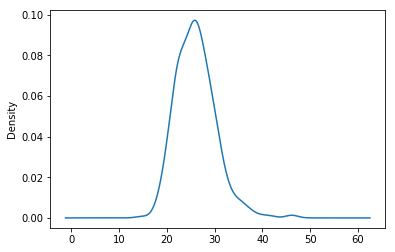

In [26]:
print("Graficos funcion de densidad para obesidad")

densidad = datos["obesity"].plot(kind='density')

Graficos funcion de densidad para alcohol


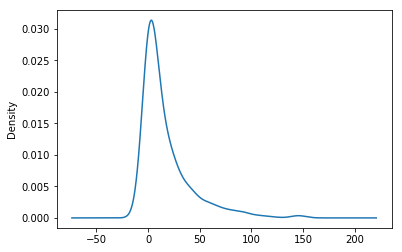

In [27]:
print("Graficos funcion de densidad para alcohol")

densidad = datos["alcohol"].plot(kind='density')

Graficos funcion de densidad para edad


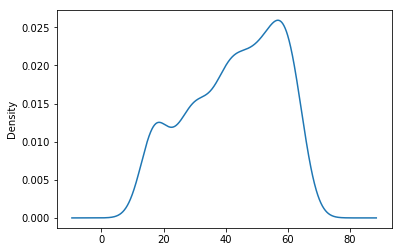

In [28]:
print("Graficos funcion de densidad para edad")

densidad = datos["age"].plot(kind='density')

Histogramas para tobacco


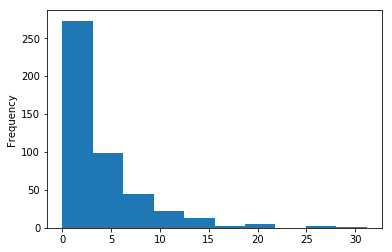

In [29]:
print("Histogramas para tobacco")

densidad = datos["tobacco"].plot(kind='hist')

Histogramas para low densiity lipoprotein 


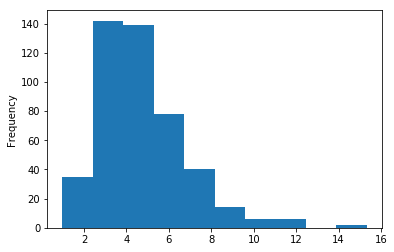

In [30]:
print("Histogramas para low densiity lipoprotein ")

densidad = datos["ldl"].plot(kind='hist')

Histogramas para adiposity


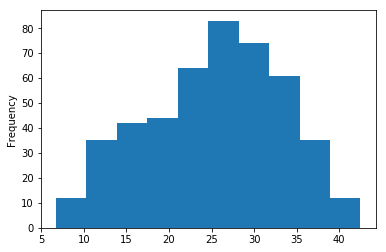

In [31]:
print("Histogramas para adiposity")

densidad = datos["adiposity"].plot(kind='hist')

Histogramas para type A


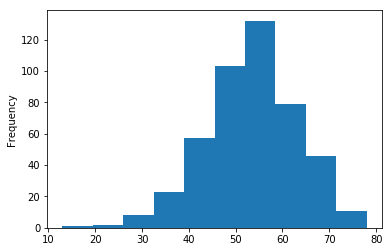

In [32]:
print("Histogramas para type A")

densidad = datos["typea"].plot(kind='hist')

Histogramas para obesidad


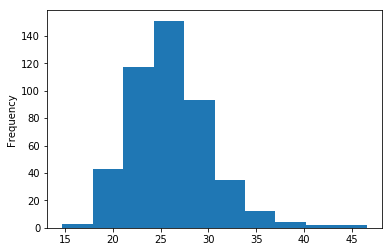

In [33]:
print("Histogramas para obesidad")

densidad = datos["obesity"].plot(kind='hist')

Histogramas para alcohol


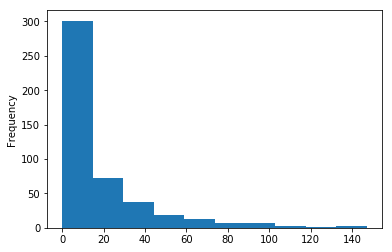

In [34]:
print("Histogramas para alcohol")

densidad = datos["alcohol"].plot(kind='hist')

Histogramas para edad


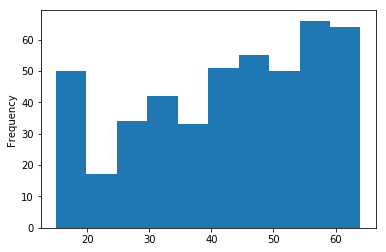

In [35]:
print("Histogramas para edad")

densidad = datos["age"].plot(kind='hist')

In [36]:
import scipy.stats

"""
Para pruebas de normalidad siempre se plantean así las hipótesis.

Hipótesis:

H0: La muestra proviene de una distribución normal.

H1: La muestra no proviene de una distribución normal.

Nivel de Significancia: El nivel de significancia que se trabajará es de 0.05. Alpha=0.05

Criterio de Decisión

Si P < Alpha Se rechaza H0

Si p >= Alpha No se rechaza H0, es decir, los datos SÍ siguen la normal
"""

obesity_alcohol = scipy.stats.shapiro(datos.iloc[:,6:7])
print(obesity_alcohol)

p_value = obesity_alcohol[1]
print(p_value)

alpha = 0.05
if p_value > alpha:
    print('Sí sigue la curva Normal (No se rechaza H0)')
else:
    print('No sigue la curva Normal (Se rechaza H0)')

(0.714347243309021, 2.5267648128466495e-27)
2.5267648128466495e-27
No sigue la curva Normal (Se rechaza H0)


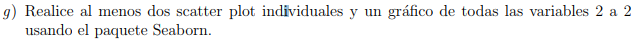

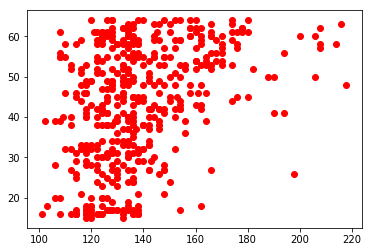

In [39]:
y = datos.iloc[:]["age"]

plt.plot(y,'o', color='red')

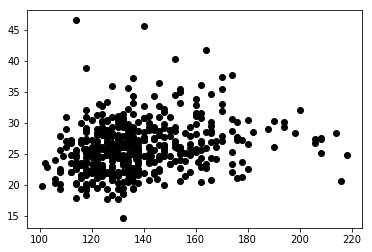

In [40]:
x = datos.iloc[:]["obesity"]

plt.plot(x,'o', color='black')

Matriz de correlaciones 

            tobacco       ldl  adiposity     typea   obesity   alcohol  \
tobacco    1.000000  0.158905   0.286640 -0.014608  0.124529  0.200813   
ldl        0.158905  1.000000   0.440432  0.044048  0.330506 -0.033403   
adiposity  0.286640  0.440432   1.000000 -0.043144  0.716556  0.100330   
typea     -0.014608  0.044048  -0.043144  1.000000  0.074006  0.039498   
obesity    0.124529  0.330506   0.716556  0.074006  1.000000  0.051620   
alcohol    0.200813 -0.033403   0.100330  0.039498  0.051620  1.000000   
age        0.450330  0.311799   0.625954 -0.102606  0.291777  0.101125   

                age  
tobacco    0.450330  
ldl        0.311799  
adiposity  0.625954  
typea     -0.102606  
obesity    0.291777  
alcohol    0.101125  
age        1.000000  


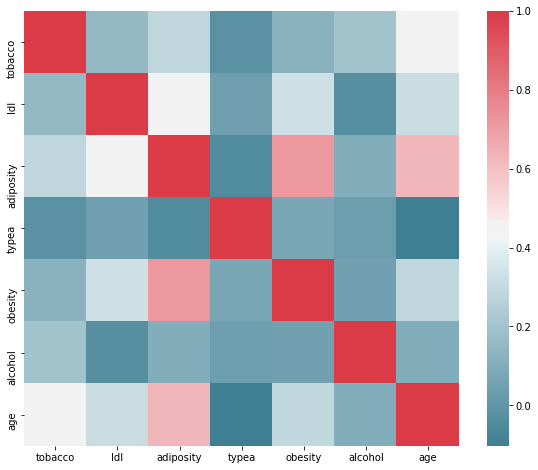

In [41]:
corr = datos.corr()
print("Matriz de correlaciones \n")
print(corr)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)